In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500) ## show more columns

# Analysis of Presidential22 dataset
This section is used to analyze the Presidential22 dataset

In [3]:
from datasets import load_presidential22, feature_engineering, remove_presidential22_extra_columns

dataset = load_presidential22()
#dataset = feature_engineering(dataset)
dataset.sample(n=3)

dataset = feature_engineering(dataset)
dataset_model = remove_presidential22_extra_columns(dataset)
dataset.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 40217 entries, 865250843527979008 to 1286324749199712256
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   nb_tweets                     40217 non-null  int64              
 1   matching_rules                40217 non-null  object             
 2   probe_date                    40217 non-null  datetime64[ns, UTC]
 3   statuses_count                40217 non-null  int64              
 4   followers_count               40217 non-null  int64              
 5   friends_count                 40217 non-null  int64              
 6   favourites_count              40217 non-null  int64              
 7   listed_count                  40217 non-null  int64              
 8   description                   40217 non-null  object             
 9   screen_name                   40217 non-null  object             
 10  nam

In [4]:
import joblib
clf = joblib.load('rf-model.pkl')
bool_mask = clf.predict(dataset_model.select_dtypes(include=['int64', 'float64', 'bool']))

dataset['label'] = bool_mask

In [5]:
print(dataset[dataset['verified'] == True]['label'].sum())

0


In [6]:
print('Sample of legitimate users:')

for idx, profile in dataset[bool_mask == 0].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))
    #print(profile)
    print('\n')

Sample of legitimate users:
https://twitter.com/467has


https://twitter.com/martin_guilhem


https://twitter.com/DLNarayan2


https://twitter.com/dominiquedeol10


https://twitter.com/kabenueve213


https://twitter.com/MoscouEnBrr


https://twitter.com/romainmnr2


https://twitter.com/tchalaaa94


https://twitter.com/JChPoisson


https://twitter.com/IaamTy__




In [7]:
print('Sample of bot users:')
for idx, profile in dataset[bool_mask == 1].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))
    #print(profile)
    print('\n')

Sample of bot users:
https://twitter.com/KimbaMufasa


https://twitter.com/23C55RH


https://twitter.com/Martinsmanuel12


https://twitter.com/choussbiquette


https://twitter.com/YvesLyon6938


https://twitter.com/Bushi_23


https://twitter.com/KiefferALC


https://twitter.com/PTagone


https://twitter.com/wahraniauzumaki


https://twitter.com/gognabru




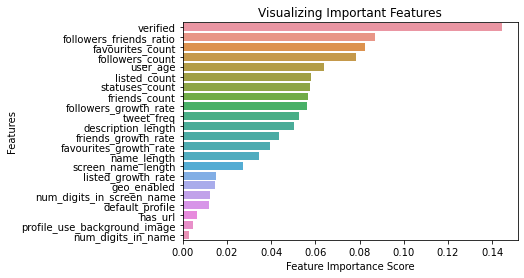

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
feature_imp = pd.Series(clf.feature_importances_,index=dataset_model.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Analysis of Twibot-20 dataset
This section is used to analyze the Twibot-20 dataset (https://arxiv.org/abs/2106.13088)

## Load the train and test datasets

In [9]:
from datasets import load_twibot20

twibot20_train = load_twibot20(dataset='train')
twibot20_test = load_twibot20(dataset='test')

## Analyse the datatests

In [10]:
twibot20_train.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label
count,8.278000e+03,8.278000e+03,8278.000000,8278.000000,8.278000e+03,8278.000000
mean,6.464586e+05,6.609915e+03,1504.488524,13297.475477,2.158684e+04,0.561247
std,4.148888e+06,6.377857e+04,9855.072510,40415.682739,9.008918e+04,0.496265
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,2.010000e+02,2.310000e+02,0.000000,146.000000,4.050000e+02,0.000000
50%,1.939500e+03,7.230000e+02,13.000000,1584.500000,3.624000e+03,1.000000
75%,3.762050e+04,2.124000e+03,258.000000,9121.250000,1.572975e+04,1.000000
max,1.124032e+08,4.339982e+06,550181.000000,783456.000000,5.140025e+06,1.000000


In [11]:
twibot20_test.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label
count,1.183000e+03,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,8.231450e+05,6449.619611,1864.894336,12514.628064,21437.875740,0.540997
std,5.577725e+06,40365.824629,9400.150853,29729.397790,57544.176485,0.498527
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.145000e+02,234.500000,1.000000,159.500000,381.000000,0.000000
50%,2.574000e+03,748.000000,17.000000,1884.000000,4051.000000,1.000000
75%,4.764750e+04,2051.500000,331.500000,10001.000000,19556.000000,1.000000
max,8.731376e+07,804528.000000,118656.000000,322238.000000,859809.000000,1.000000


Although the train and test datasets are split into two files, we could merge them together and separate them ourselves.

The train and test datasets have 8278 and 1183 entries, respectively.

In [12]:
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   location                      8278 non-null   object             
 3   profile_location              728 non-null    object             
 4   description                   8278 non-null   object             
 5   url                           4028 non-null   object             
 6   entities                      8278 non-null   object             
 7   protected                     8278 non-null   bool               
 8   followers_count               8278 non-null   int64              
 9   friends_count                 8278 non-null   int64              
 10  listed_count             

In [13]:
twibot20_train.sample(3)

,name,screen_name,location,profile_location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_tile,profile_image_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,label,probe_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2229270474,Diana Cazadora,Ahrtemisa,,None,Provida Intransigente 💙💙💙,None,{'description': {'urls': []}},False,666,927,1,2013-12-04 04:18:23+00:00,28286,None,None,False,False,16294,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1269493322...,1B95E0,000000,000000,000000,False,False,False,False,0,2020-09-06 00:00:00+00:00
1293426261369303040,Vissampalli Praveen,VissampalliPra3,,None,vissampallipraveen@gmail.com,None,{'description': {'urls': []}},False,37,516,0,2020-08-12 05:57:19+00:00,254,None,None,False,False,9,None,False,False,False,F5F8FA,None,False,http://pbs.twimg.com/profile_images/1293426484...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,0,2020-09-06 00:00:00+00:00
64341728,OLUWASAANUMI 🇳🇬,SanRomeo,Winterfell,None,"Surely, Goodness & Mercy Are Following Me | So...",None,{'description': {'urls': []}},False,31973,12961,40,2009-08-10 05:19:02+00:00,1356,None,None,True,False,99503,None,False,False,False,FF6699,http://abs.twimg.com/images/themes/theme11/bg....,True,http://pbs.twimg.com/profile_images/9676660166...,B40B43,FFFFFF,E5507E,362720,True,True,False,False,1,2020-09-06 00:00:00+00:00


The dataset contains various information provided by the Twitter API. We have access to the account name called "name", the unique username called "screen_name", the location, the description, the number of followers/friends/lists/favorites/statuses, the date of creation, if the account has been verified by Twitter. All the attributes and their description are available at https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user.

Two additional columns are present: the label identifies whether the user is a bot (1) or not (0), the probe_date is used to describe when the data was collected.

Many columns are irrelevant for the detection of bots, we can remove them. We start with the boolean columns:

In [14]:
for col in twibot20_train.select_dtypes(include=['bool']).columns:
    print(f"{col}:")
    print(twibot20_train[col].value_counts())
    print('')

protected:
False    8277
True        1
Name: protected, dtype: int64

geo_enabled:
False    4823
True     3455
Name: geo_enabled, dtype: int64

verified:
False    6221
True     2057
Name: verified, dtype: int64

contributors_enabled:
False    8278
Name: contributors_enabled, dtype: int64

is_translator:
False    8276
True        2
Name: is_translator, dtype: int64

is_translation_enabled:
False    8106
True      172
Name: is_translation_enabled, dtype: int64

profile_background_tile:
False    6895
True     1383
Name: profile_background_tile, dtype: int64

profile_use_background_image:
True     6878
False    1400
Name: profile_use_background_image, dtype: int64

has_extended_profile:
False    5227
True     3051
Name: has_extended_profile, dtype: int64

default_profile:
False    4176
True     4102
Name: default_profile, dtype: int64

default_profile_image:
False    8071
True      207
Name: default_profile_image, dtype: int64



We conclude that the protected column can be removed as the values are mostly False and it has been deprecated by the Twitter API. We can remove contributors_enabled, is_translation_enabled, is_translator and profile_location for the same reasons.

We also remove columns that only contain empty values and irrelevant columns (colors, profile/background urls). 

In [15]:
from datasets import remove_useless_api_columns

twibot20_train = remove_useless_api_columns(twibot20_train)
twibot20_test = remove_useless_api_columns(twibot20_test)
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   location                      8278 non-null   object             
 3   description                   8278 non-null   object             
 4   url                           4028 non-null   object             
 5   followers_count               8278 non-null   int64              
 6   friends_count                 8278 non-null   int64              
 7   listed_count                  8278 non-null   int64              
 8   created_at                    8278 non-null   datetime64[ns, UTC]
 9   favourites_count              8278 non-null   int64              
 10  geo_enabled              

## Feature engineering
At the moment we are somewhat limited in the number of available features. We will use feature engineering with methods found in (https://arxiv.org/abs/1911.09179), as well as our own features.

(https://arxiv.org/abs/1911.09179) adds the user_age, tweet_freq, followers/friends/favourites/listed_growth_rate, followers_friends_ratio, (screen_)name_length, description_length, num_digits_in_(screen_)name. We also replace location and url by two booleans indicating whether the field is non-null.

In [16]:
from datasets import feature_engineering

twibot20_train = feature_engineering(twibot20_train)
twibot20_train.sort_index(axis=1, inplace=True)

twibot20_test = feature_engineering(twibot20_test)
twibot20_test.sort_index(axis=1, inplace=True)
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    8278 non-null   datetime64[ns, UTC]
 1   default_profile               8278 non-null   bool               
 2   default_profile_image         8278 non-null   bool               
 3   description                   8278 non-null   object             
 4   description_length            8278 non-null   int64              
 5   favourites_count              8278 non-null   int64              
 6   favourites_growth_rate        8278 non-null   float64            
 7   followers_count               8278 non-null   int64              
 8   followers_friends_ratio       8278 non-null   float64            
 9   followers_growth_rate         8278 non-null   float64            
 10  friends_count            

In [17]:
twibot20_train.describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,8278.000000,8278.000000,8278.000000,8.278000e+03,8.278000e+03,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8278.000000,8.278000e+03,8278.000000,8.278000e+03
mean,83.046146,13297.475477,0.000094,6.464586e+05,2.860677e+04,0.002140,6.609915e+03,0.000039,0.561247,1504.488524,4.554513e-06,14.057381,0.104011,0.764557,12.139889,2.158684e+04,0.000096,2.230634e+08
std,55.984721,40415.682739,0.000317,4.148888e+06,9.288078e+05,0.012462,6.377857e+04,0.000233,0.496265,9855.072510,2.688255e-05,6.125798,0.596134,1.756609,2.710466,9.008918e+04,0.000321,1.229977e+08
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,3.000000,0.000000e+00,0.000000,1.442620e+05
25%,30.000000,146.000000,0.000001,2.010000e+02,3.266071e-01,0.000002,2.310000e+02,0.000001,0.000000,0.000000,0.000000e+00,11.000000,0.000000,0.000000,10.000000,4.050000e+02,0.000003,1.153540e+08
50%,86.000000,1584.500000,0.000009,1.939500e+03,1.040150e+00,0.000012,7.230000e+02,0.000004,1.000000,13.000000,7.091948e-08,14.000000,0.000000,0.000000,12.000000,3.624000e+03,0.000019,2.493283e+08
75%,138.000000,9121.250000,0.000051,3.762050e+04,2.620716e+01,0.000180,2.124000e+03,0.000014,1.000000,258.000000,1.075070e-06,17.000000,0.000000,1.000000,14.000000,1.572975e+04,0.000073,3.348414e+08
max,202.000000,783456.000000,0.006245,1.124032e+08,5.828524e+07,0.311287,4.339982e+06,0.012088,1.000000,550181.000000,1.523659e-03,51.000000,10.000000,13.000000,16.000000,5.140025e+06,0.015001,4.563762e+08


In [18]:
twibot20_train.sample(5)

,created_at,default_profile,default_profile_image,description,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,geo_enabled,has_url,label,listed_count,listed_growth_rate,location,name,name_length,num_digits_in_name,num_digits_in_screen_name,probe_date,profile_background_tile,profile_use_background_image,screen_name,screen_name_length,statuses_count,tweet_freq,url,user_age,verified
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1222652534306701314,2020-01-29 22:47:51+00:00,True,False,Huge nba fan and I like Jared Dudley,37,5,2.629872e-07,15,0.005214,7.889617e-07,2877,1.513229e-04,False,False,0,0,0.000000e+00,,Tony Sperandeo,15,0,0,2020-09-06 00:00:00+00:00,False,True,SperandeoTony,14,11,5.785719e-07,None,19012329.0,False
1299102143547428864,2020-08-27 21:51:17+00:00,True,False,👻ari3_b3ar,11,4,5.093446e-06,3,0.090909,3.820084e-06,33,4.202093e-05,False,False,0,0,0.000000e+00,,Arie bileen,12,0,0,2020-09-06 00:00:00+00:00,False,True,ArieBileen,11,1,1.273361e-06,None,785323.0,False
1158852089495347200,2019-08-06 21:27:23+00:00,True,True,,1,212,6.194564e-06,6,0.025641,1.753178e-07,234,6.837396e-06,False,False,0,0,0.000000e+00,,Rodrigo Lankenau,17,0,0,2020-09-06 00:00:00+00:00,False,True,LankenauRodrigo,16,9,2.629768e-07,None,34223557.0,False
1030336342729707520,2018-08-17 06:11:41+00:00,True,False,WWG1WGA👌Q+ ❤️ Q 🗽 Trust the PLAN! AZ! 🇺🇸🇺🇸🇺🇸🇺🇸...,126,5076,7.825592e-05,3509,0.745802,5.409772e-05,4705,7.253627e-05,False,True,1,1,1.541685e-08,"Arizona, USA",29552love45&17,15,9,2,2020-09-06 00:00:00+00:00,False,True,love45Q,8,2763,4.259675e-05,https://t.co/5a7cTtKm7q,64864099.0,False
737918314647851008,2016-06-01 08:06:50+00:00,True,False,,1,94,6.984590e-07,26,0.320988,1.931908e-07,81,6.018636e-07,False,False,1,3,2.229124e-08,"Texas, USA",El Gringo42,12,2,0,2020-09-06 00:00:00+00:00,False,True,ElGringoSalvaje,16,18,1.337475e-07,None,134581990.0,False


In [19]:
twibot20_train[twibot20_train['tweet_freq'] > 100]

,created_at,default_profile,default_profile_image,description,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,geo_enabled,has_url,label,listed_count,listed_growth_rate,location,name,name_length,num_digits_in_name,num_digits_in_screen_name,probe_date,profile_background_tile,profile_use_background_image,screen_name,screen_name_length,statuses_count,tweet_freq,url,user_age,verified
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Analysis of the features


In [20]:
print("Train dataset")
print("Number of users: {}".format(len(twibot20_train)))
print("Number of verified users: {}".format(twibot20_train['verified'].sum()))

Train dataset
Number of users: 8278
Number of verified users: 2057


In [21]:
print("Test dataset")
print("Number of users: {}".format(len(twibot20_test)))
print("Number of verified users: {}".format(twibot20_test['verified'].sum()))

Test dataset
Number of users: 1183
Number of verified users: 326


In [22]:
print('Sample of legitimate users:')
for idx, profile in twibot20_train[twibot20_train['label'] == 0].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of legitimate users:
https://twitter.com/BoarControl 
https://twitter.com/DiegoForlan7 
https://twitter.com/boocaprincesses 
https://twitter.com/fguarin13 
https://twitter.com/PerezEd 
https://twitter.com/AlyshaNBCBoston 
https://twitter.com/EricHolder 
https://twitter.com/bomberosmuni 
https://twitter.com/CDNBaseballHOF 
https://twitter.com/OhizzFay 


In [23]:
print('Sample of bots:')
for idx, profile in twibot20_train[twibot20_train['label'] == 1].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of bots:
https://twitter.com/FakeDeclanRice 
https://twitter.com/JustTheFactsPpl 
https://twitter.com/ldlhomewood 
https://twitter.com/mkung 
https://twitter.com/strolicious 
https://twitter.com/skynetcap 
https://twitter.com/WunderlichChiro 
https://twitter.com/susanjaffe 
https://twitter.com/CASPER23725554 
https://twitter.com/RebHinds 


### 2D PCA analysis

<IPython.core.display.Javascript object>


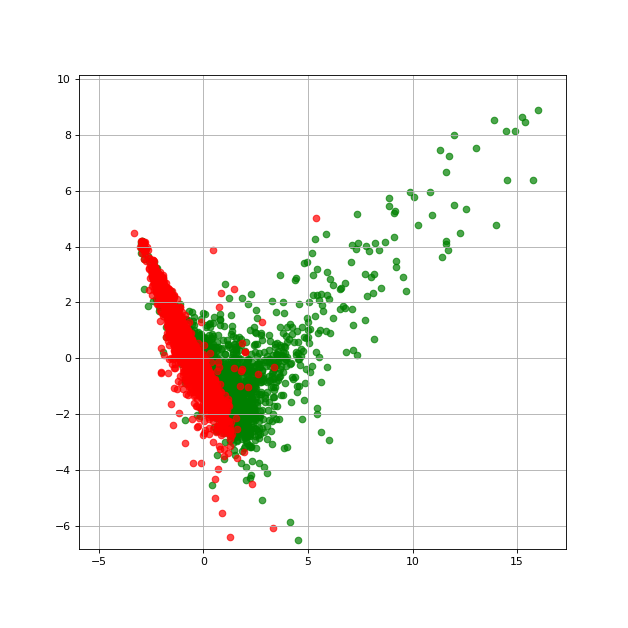

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

def draw_pca(data):
    # PCA analysis only on bool, int64 and float64
    X_raw = data.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
    sc = StandardScaler()
    sc.fit(X_raw)
    
    X = sc.transform(X_raw)    
    y = data['label']

    fig = plt.figure(1, figsize=(8, 8))
    ax = fig.add_subplot(1,1,1)

    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)

    for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
        ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

    ax.grid()
    plt.show()

%matplotlib notebook
draw_pca(twibot20_train)
#draw_pca(dataset)

### Analysis of the annotation
Quality of the annotation using global data

In [27]:

# Account reputation based on Chu et al 
def reputation(user):
    a = abs(user['followers_count'])
    b = abs(user['followers_count']) + abs(user['friends_count'])
    
    return a / b if b != 0 else 0

In [28]:
print('Mean reputation of twibot20_train: {}'.format(twibot20_train.apply(reputation, axis=1).mean()))
print('Mean reputation of twibot20_test : {}\n'.format(twibot20_test.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in twibot20_train: {}'.format(twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of bots in twibot20_test : {}\n'.format(twibot20_test[twibot20_test['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in twibot20_train: {}'.format(twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1).mean()))
print('Mean reputation of users in twibot20_test : {}'.format(twibot20_test[twibot20_test['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of twibot20_train: 0.5674009934923705
Mean reputation of twibot20_test : 0.5790589291082497

Mean reputation of bots in twibot20_train: 0.43975627325969713
Mean reputation of bots in twibot20_test : 0.43376147239652296

Mean reputation of users in twibot20_train: 0.7306822077547602
Mean reputation of users in twibot20_test : 0.7503119167611139


### Random forest model

In [101]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

# PCA analysis only on bool, int64 and float64
X_train = twibot20_train.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_train = twibot20_train['label']

X_test = twibot20_test.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_test = twibot20_test['label']

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8140321217244294


In [102]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

verified                        0.208248
followers_friends_ratio         0.102334
followers_count                 0.084645
listed_count                    0.066665
followers_growth_rate           0.060205
user_age                        0.054677
statuses_count                  0.049643
friends_count                   0.048519
description_length              0.043440
favourites_count                0.042700
friends_growth_rate             0.040118
tweet_freq                      0.038297
favourites_growth_rate          0.035706
name_length                     0.033705
screen_name_length              0.026211
listed_growth_rate              0.020686
num_digits_in_screen_name       0.013977
has_url                         0.009154
geo_enabled                     0.008639
default_profile                 0.005480
profile_use_background_image    0.003710
num_digits_in_name              0.003240
dtype: float64

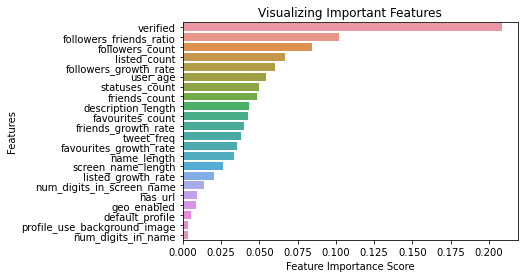

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [104]:
bots_pred = clf.predict(dataset_model.sort_index(axis=1).select_dtypes(include=['int64', 'float64', 'bool']))
bots_pred.sum()

/home/rmuller/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


38689

# Cresci-2017 dataset
## Loading the dataset

In [32]:
from datasets import load_cresci17
cresci17_raw = load_cresci17()
cresci17_raw.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,utc_offset,is_translator,follow_request_sent,protected,notifications,contributors_enabled,following,test_set_1,test_set_2,label
count,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,5015.000000,1.0,0.0,78.0,0.0,0.0,0.0,4465.000000,3938.000000,11017.000000
mean,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,-5901.954138,1.0,NaN,1.0,NaN,NaN,NaN,0.445913,0.242255,0.684669
std,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,18906.166175,NaN,NaN,0.0,NaN,NaN,NaN,0.497122,0.428502,0.464669
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-39600.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,46.000000,6.000000e+00,40.000000,0.000000,0.000000,-18000.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,99.000000,1.310000e+02,202.000000,0.000000,1.000000,-14400.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,1.000000
75%,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,10800.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.000000,0.000000,1.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,46800.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [33]:
from datasets import remove_cresci17_extra_columns

cresci17 = feature_engineering(remove_useless_api_columns(remove_cresci17_extra_columns(cresci17_raw)))
cresci17.sort_index(axis=1, inplace=True)
cresci17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 1502026416 to 2438666143
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    11017 non-null  datetime64[ns, UTC]
 1   default_profile               11017 non-null  bool               
 2   default_profile_image         11017 non-null  bool               
 3   description                   11017 non-null  object             
 4   description_length            11017 non-null  int64              
 5   favourites_count              11017 non-null  int64              
 6   favourites_growth_rate        11017 non-null  float64            
 7   followers_count               11017 non-null  int64              
 8   followers_friends_ratio       11017 non-null  float64            
 9   followers_growth_rate         11017 non-null  float64            
 10  friends_count       

## PCA analysis

In [34]:
cresci17.describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,11017.000000,11017.000000,11017.000000,1.101700e+04,11017.000000,1.101700e+04,11017.000000,1.101700e+04,11017.000000,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,1.101700e+04,1.101700e+04
mean,46.488064,1492.338568,0.000014,1.126982e+03,2.294207,7.191193e-06,656.010075,4.743037e-06,0.684669,14.550513,8.830639e-08,12.369338,0.027866,0.367341,11.800490,6581.373877,5.952272e-05,1.289338e+08
std,52.232170,6856.574350,0.000065,3.069802e+04,57.977597,1.402613e-04,3039.022632,1.677761e-05,0.464669,304.798431,1.357688e-06,4.142765,0.356551,1.036392,2.238532,19725.682122,2.000565e-04,7.336029e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,9.134916e+06
25%,0.000000,0.000000,0.000000,6.000000e+00,0.136364,9.267790e-08,40.000000,6.164808e-07,0.000000,0.000000,0.000000e+00,10.000000,0.000000,0.000000,10.000000,46.000000,6.629497e-07,6.477335e+07
50%,26.000000,0.000000,0.000000,1.310000e+02,0.437781,1.016385e-06,202.000000,1.355042e-06,1.000000,1.000000,5.484376e-09,13.000000,0.000000,0.000000,12.000000,99.000000,1.104501e-06,1.159364e+08
75%,96.000000,196.000000,0.000002,5.200000e+02,1.062753,3.250964e-06,542.000000,3.615283e-06,1.000000,5.000000,3.625249e-08,15.000000,0.000000,0.000000,14.000000,4272.000000,3.736641e-05,1.986705e+08
max,298.000000,313954.000000,0.003026,2.991573e+06,4794.333333,1.346266e-02,211890.000000,9.535460e-04,1.000000,24348.000000,1.095707e-04,48.000000,25.000000,11.000000,15.000000,399555.000000,6.509910e-03,2.886269e+08


<IPython.core.display.Javascript object>


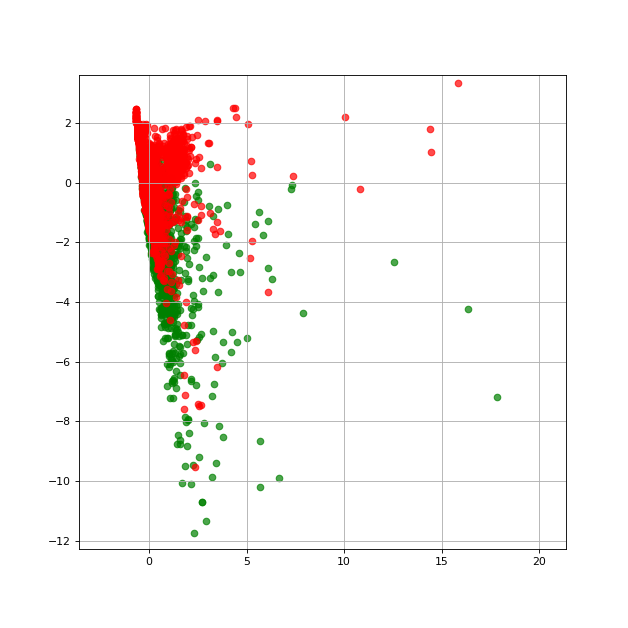

In [35]:
%matplotlib notebook
draw_pca(cresci17)

In [36]:
print('Mean reputation of cresci17 : {}\n'.format(cresci17.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in cresci17 : {}\n'.format(cresci17[cresci17['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in cresci17 : {}'.format(cresci17[cresci17['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of cresci17 : 0.33833945494277506

Mean reputation of bots in cresci17 : 0.262608382793261

Mean reputation of users in cresci17 : 0.5027722347999382


## Random forest model

In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
X = cresci17.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y = cresci17['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

In [38]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9856985698569857


In [39]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

favourites_count                0.334799
favourites_growth_rate          0.141793
statuses_count                  0.120933
tweet_freq                      0.120452
geo_enabled                     0.045620
followers_count                 0.034733
user_age                        0.032806
friends_count                   0.032204
followers_friends_ratio         0.029412
description_length              0.020850
name_length                     0.018766
default_profile                 0.013089
friends_growth_rate             0.013001
listed_count                    0.009267
screen_name_length              0.008390
followers_growth_rate           0.007835
has_url                         0.005712
profile_background_tile         0.003032
profile_use_background_image    0.002291
num_digits_in_screen_name       0.002291
listed_growth_rate              0.002053
num_digits_in_name              0.000398
default_profile_image           0.000220
verified                        0.000051
dtype: float64

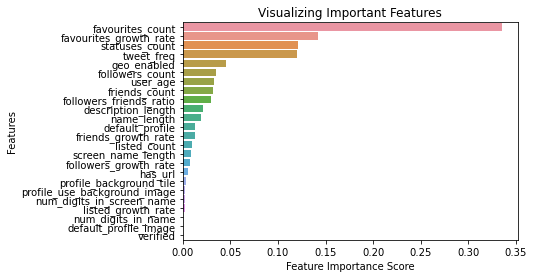

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [41]:
X_test['verified'].value_counts()

False    3634
True        2
Name: verified, dtype: int64

# Midterm-2018 dataset

In [42]:
from datasets import load_midterm18
midterm18_raw = load_midterm18()
midterm18_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50538 entries, 4107317134 to 1078964200234536960
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   probe_date                    50538 non-null  datetime64[ns, UTC]
 1   screen_name                   50538 non-null  object             
 2   name                          50538 non-null  object             
 3   description                   50538 non-null  object             
 4   created_at                    50538 non-null  datetime64[ns, UTC]
 5   url                           7473 non-null   object             
 6   lang                          50538 non-null  object             
 7   protected                     46995 non-null  float64            
 8   verified                      50538 non-null  bool               
 9   geo_enabled                   50538 non-null  bool               
 10  profile_use

In [43]:
midterm18_raw.sample(3)

,probe_date,screen_name,name,description,created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,label
id,,,,,,,,,,,,,,,,,,,
1054773679073251329,2018-10-24 23:12:02+00:00,pamella23907340,pamella,,2018-10-23 16:36:56+00:00,None,en,0.0,False,False,True,True,0,0,0,0,120,1055235496534818816,1
1049666760968826881,2018-10-17 02:11:05+00:00,cordeli02919141,cordelia,,2018-10-09 14:23:52+00:00,None,en,0.0,False,False,True,True,2,1,0,0,30,1052381451654578177,1
1058987597651791872,2018-11-05 08:14:58+00:00,diamond__48,[메트맘콕]다이아몬드,전 계정 @angleshyun56\n몽차 백링 LENA 내 사람들💛,2018-11-04 07:41:33+00:00,http://asked.kr/angleshyun56,ko,0.0,False,False,True,True,129,130,0,175,329,1059358396795613184,1


In [44]:
from datasets import remove_midterm18_extra_columns

midterm18 = feature_engineering(remove_useless_api_columns(remove_midterm18_extra_columns(midterm18_raw)))
midterm18.sort_index(axis=1, inplace=True)
midterm18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50538 entries, 4107317134 to 1078964200234536960
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    50538 non-null  datetime64[ns, UTC]
 1   default_profile               50538 non-null  bool               
 2   description                   50538 non-null  object             
 3   description_length            50538 non-null  int64              
 4   favourites_count              50538 non-null  int64              
 5   favourites_growth_rate        50538 non-null  float64            
 6   followers_count               50538 non-null  int64              
 7   followers_friends_ratio       50538 non-null  float64            
 8   followers_growth_rate         50538 non-null  float64            
 9   friends_count                 50538 non-null  int64              
 10  friends_gro

In [45]:
midterm18.describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,50538.000000,50538.000000,50538.000000,5.053800e+04,50538.000000,5.053800e+04,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,5.053800e+04,5.053800e+04
mean,34.613697,2314.836855,0.000688,2.646619e+03,3.802432,1.450691e-04,291.848649,0.002463,0.839883,15.767264,0.000002,11.064427,0.239463,3.274447,12.823281,2450.863944,3.290288e-03,3.536830e+07
std,50.807892,12672.635307,0.005323,2.322714e+05,181.025669,1.178014e-03,2671.673946,0.014808,0.366718,449.017746,0.000032,5.351100,1.300856,3.347128,2.455673,13770.228640,1.216894e-02,8.189664e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.646877e-09,2.100000e+01
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,11.000000,8.000000,2.192419e-05,1.909625e+04
50%,0.000000,0.000000,0.000000,1.000000e+00,0.000000,4.003104e-08,9.000000,0.000002,1.000000,0.000000,0.000000,11.000000,0.000000,2.000000,14.000000,30.000000,1.631043e-04,2.480490e+05
75%,57.000000,75.000000,0.000064,1.600000e+01,0.189262,9.245883e-06,141.000000,0.000136,1.000000,0.000000,0.000000,14.000000,0.000000,8.000000,15.000000,147.000000,1.910641e-03,1.630540e+07
max,197.000000,463821.000000,0.255042,5.086590e+07,26997.250000,1.564589e-01,298234.000000,0.685714,1.000000,67930.000000,0.002591,50.000000,47.000000,14.000000,15.000000,599307.000000,4.245283e-01,3.752213e+08


We can see that some features (profile_background_tile, location, default_profile_image) are missing from the dataset compared to TwiBot-20 and Cresci-17. This will have to be taken into consideration when mixing datasets.

### PCA analysis

<IPython.core.display.Javascript object>


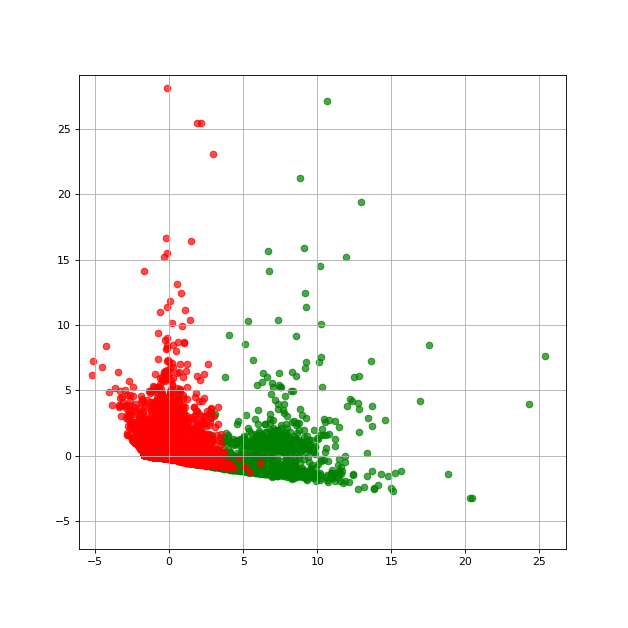

In [46]:
%matplotlib notebook
draw_pca(midterm18)

In [47]:
print('Mean reputation of midterm18 : {}\n'.format(midterm18.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in midterm18 : {}\n'.format(midterm18[midterm18['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in midterm18 : {}'.format(midterm18[midterm18['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of midterm18 : 0.19110602694413062

Mean reputation of bots in midterm18 : 0.14233387711910275

Mean reputation of users in midterm18 : 0.4469368069086799


## Random forest model

In [48]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
X = midterm18.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y = midterm18['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

In [49]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9938241995443099


In [53]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

user_age                        0.281945
favourites_count                0.138918
statuses_count                  0.124132
listed_count                    0.092727
followers_count                 0.082664
followers_friends_ratio         0.043063
geo_enabled                     0.041671
friends_growth_rate             0.036040
default_profile                 0.031785
friends_count                   0.026153
tweet_freq                      0.023941
followers_growth_rate           0.020217
favourites_growth_rate          0.014606
description_length              0.012765
num_digits_in_screen_name       0.012005
has_url                         0.006093
screen_name_length              0.003875
name_length                     0.003129
profile_use_background_image    0.002400
listed_growth_rate              0.001454
num_digits_in_name              0.000355
verified                        0.000062
dtype: float64

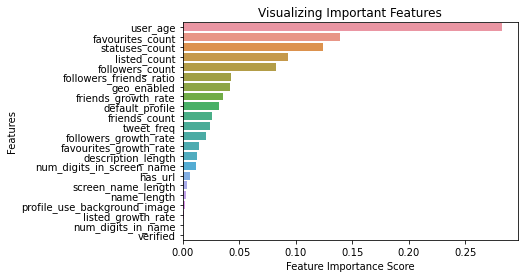

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Mixing datasets
### Generalization capabilities

First, let's see whether the models trained on a dataset works on other datasets.

In [95]:
twibot20_bots = twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1)
twibot20_users = twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1)

cresci17_bots = cresci17[cresci17['label'] == 1].apply(reputation, axis=1)
cresci17_users = cresci17[cresci17['label'] == 0].apply(reputation, axis=1)

midterm18_bots = midterm18[midterm18['label'] == 1].apply(reputation, axis=1)
midterm18_users = midterm18[midterm18['label'] == 0].apply(reputation, axis=1)

dataset_rep = dataset_model.apply(reputation, axis=1)

<IPython.core.display.Javascript object>


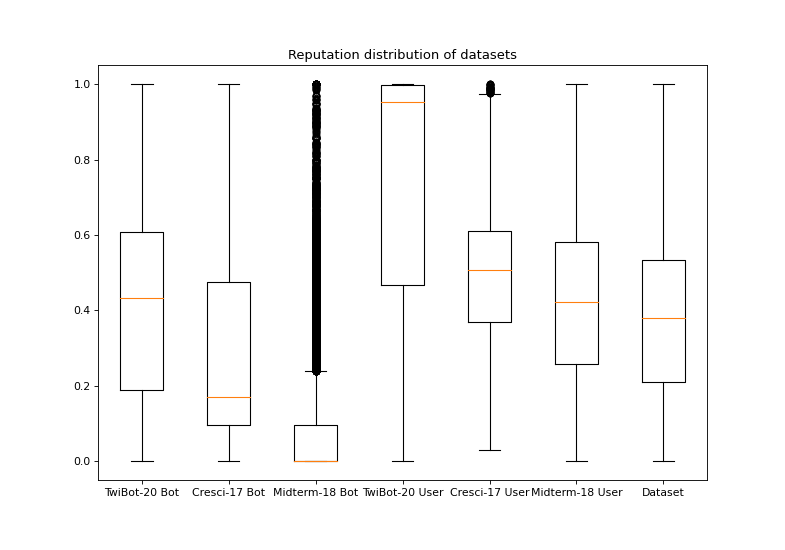

In [96]:
data = [twibot20_bots.values, cresci17_bots.values, midterm18_bots.values, twibot20_users.values, cresci17_users.values, midterm18_users.values, dataset_rep.values]
labels = ['TwiBot-20 Bot', 'Cresci-17 Bot', 'Midterm-18 Bot', 'TwiBot-20 User', 'Cresci-17 User', 'Midterm-18 User', 'Dataset']

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Reputation distribution of datasets')
ax.boxplot(data)
ax.set_xticklabels(labels);

In [57]:
print('Mean reputation of twibot20 : {}'.format(twibot20_train.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in twibot20 : {}'.format(twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in twibot20 : {}\n'.format(twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1).mean()))

print('Mean reputation of cresci17 : {}'.format(cresci17.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in cresci17 : {}'.format(cresci17[cresci17['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in cresci17 : {}\n'.format(cresci17[cresci17['label'] == 0].apply(reputation, axis=1).mean()))

print('Mean reputation of midterm18 : {}'.format(midterm18.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in midterm18 : {}'.format(midterm18[midterm18['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in midterm18 : {}\n'.format(midterm18[midterm18['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of twibot20 : 0.5674009934923705
Mean reputation of bots in twibot20 : 0.43975627325969713
Mean reputation of users in twibot20 : 0.7306822077547602

Mean reputation of cresci17 : 0.33833945494277506
Mean reputation of bots in cresci17 : 0.262608382793261
Mean reputation of users in cresci17 : 0.5027722347999382

Mean reputation of midterm18 : 0.19110602694413062
Mean reputation of bots in midterm18 : 0.14233387711910275
Mean reputation of users in midterm18 : 0.4469368069086799



<IPython.core.display.Javascript object>


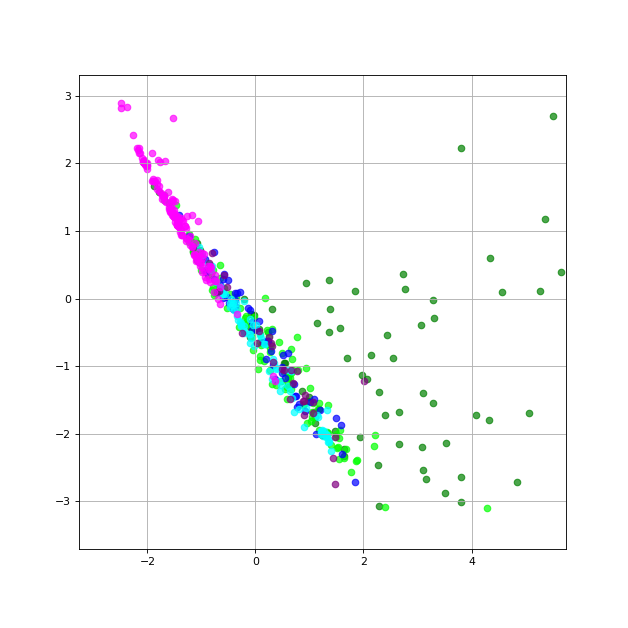

In [89]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

%matplotlib notebook

twibot20_pca = twibot20_train.sample(200).copy()
cresci17_pca = cresci17.sample(200).copy()
midterm18_pca = midterm18.sample(200).copy()

twibot20_pca['label'] = twibot20_pca['label'].apply(lambda lbl: ('twibot20', lbl))
cresci17_pca['label'] = cresci17_pca['label'].apply(lambda lbl: ('cresci17', lbl))
midterm18_pca['label'] = midterm18_pca['label'].apply(lambda lbl: ('midterm18', lbl))

data = pd.concat([twibot20_pca, cresci17_pca, midterm18_pca])
X_raw = data.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])

sc = StandardScaler()
sc.fit(X_raw)
X = sc.transform(X_raw)
y = data['label']

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

colors = [(("twibot20", 0), 'green'), (("twibot20", 1), 'lime'),
          (("cresci17", 0), 'blue'), (("cresci17", 1), 'cyan'),
          (("midterm18", 0), 'purple'), (("midterm18", 1), 'magenta')]
for label, c in colors:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()


twibot20_pca = twibot20_pca[0:0]
cresci17_pca = cresci17_pca[0:0]
midterm18_pca = midterm18_pca[0:0]

In [60]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
# Drop columns missing from midterm18
X_twibot20 = twibot20_train.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_twibot20 = twibot20_train['label']
X_twibot20_train, X_twibot20_test, y_twibot20_train, y_twibot20_test = train_test_split(X_twibot20, y_twibot20,test_size=0.33, random_state=80)

X_cresci17 = cresci17.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_cresci17 = cresci17['label']
X_cresci17_train, X_cresci17_test, y_cresci17_train, y_cresci17_test = train_test_split(X_cresci17, y_cresci17,test_size=0.33, random_state=80)

X_midterm18 = midterm18.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_midterm18 = midterm18['label']
X_midterm18_train, X_midterm18_test, y_midterm18_train, y_midterm18_test = train_test_split(X_midterm18, y_midterm18,test_size=0.33, random_state=80)

#### Model trained using TwiBot-20

In [61]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_train, y_twibot20_train)

y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)
y_midterm18_pred=clf.predict(X_midterm18_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of twibot20   :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print("                     f1:", metrics.f1_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17   :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print("                     f1:", metrics.f1_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))
print("Accuracy on midterm18  :", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print("                     f1:", metrics.f1_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))

"""
              pred
            1       0
          -----   -----
       1 |  TP  |  FP
truth     -----   -----
       0 |  FN  |  TN
""";

Accuracy of twibot20   : 0.8144216691068814
                     f1: 0.8553495007132668
[[1499   50]
 [ 457  726]]
Accuracy on cresci17   : 0.6960946094609461
                     f1: 0.8185252093939892
[[2492    1]
 [1104   39]]
Accuracy on midterm18  : 0.8207219091018108
                     f1: 0.9002934507136188
[[13499   559]
 [ 2431   189]]


In [62]:
y_twibot20_test.sum()

1549

#### Model trained using Cresci-17

In [63]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cresci17_train, y_cresci17_train)

y_cresci17_pred=clf.predict(X_cresci17_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_midterm18_pred=clf.predict(X_midterm18_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))

Accuracy of cresci17 : 0.9851485148514851
[[2461   32]
 [  22 1121]]
Accuracy on twibot20 : 0.45095168374816985
[[ 122 1427]
 [  73 1110]]
Accuracy on midterm18: 0.6927689171363473
[[8958 5100]
 [  24 2596]]


#### Model trained using Midterm-18

In [64]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_midterm18_train, y_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))

Accuracy of midterm18: 0.9936443218611344
[[14009    49]
 [   57  2563]]
Accuracy on twibot20 : 0.44765739385065884
[[ 109 1440]
 [  69 1114]]
Accuracy on cresci17 : 0.3193069306930693
[[  22 2471]
 [   4 1139]]


In [65]:
# Use only 5000 sample of each
from sklearn.model_selection import train_test_split

rand = 346
# Split the dataset into train, test
twibot20_sample = twibot20_train.sample(8000, random_state=rand)
cresci17_sample = cresci17.sample(3000, random_state=rand)
midterm18_sample = midterm18.sample(5000, random_state=rand)

# Drop columns missing from midterm18
X_twibot20 = twibot20_sample.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_twibot20 = twibot20_sample['label']
X_twibot20_train, X_twibot20_test, y_twibot20_train, y_twibot20_test = train_test_split(X_twibot20, y_twibot20,test_size=0.33, random_state=80)

X_cresci17 = cresci17_sample.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_cresci17 = cresci17_sample['label']
X_cresci17_train, X_cresci17_test, y_cresci17_train, y_cresci17_test = train_test_split(X_cresci17, y_cresci17,test_size=0.33, random_state=80)

X_midterm18 = midterm18_sample.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_midterm18 = midterm18_sample['label']
X_midterm18_train, X_midterm18_test, y_midterm18_train, y_midterm18_test = train_test_split(X_midterm18, y_midterm18,test_size=0.33, random_state=80)

In [66]:
# Cresci + midterm dataset
X_cresci17_midterm18_train = pd.concat([X_cresci17_train, X_midterm18_train])
y_cresci17_midterm18_train = pd.concat([y_cresci17_train, y_midterm18_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cresci17_midterm18_train, y_cresci17_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))

Accuracy of midterm18: 0.9933333333333333
[[1390    2]
 [   9  249]]
Accuracy on twibot20 : 0.49772727272727274
[[ 268 1196]
 [ 130 1046]]
Accuracy on cresci17 : 0.9848484848484849
[[657   6]
 [  9 318]]


In [67]:
# Twibot + cresci dataset
X_twibot20_cresci17_train = pd.concat([X_twibot20_train, X_cresci17_train ])
y_twibot20_cresci17_train = pd.concat([y_twibot20_train, y_cresci17_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_cresci17_train, y_twibot20_cresci17_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))

Accuracy of midterm18: 0.7993939393939394
[[1227  165]
 [ 166   92]]
Accuracy on twibot20 : 0.8007575757575758
[[1359  105]
 [ 421  755]]
Accuracy on cresci17 : 0.9363636363636364
[[659   4]
 [ 59 268]]


In [68]:
# Twibot + midterm dataset
X_twibot20_midterm18_train = pd.concat([X_twibot20_train, X_cresci17_train ])
y_twibot20_midterm18_train = pd.concat([y_twibot20_train, y_cresci17_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_midterm18_train, y_twibot20_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))

Accuracy of midterm18: 0.8290909090909091
[[1283  109]
 [ 173   85]]
Accuracy on twibot20 : 0.806060606060606
[[1365   99]
 [ 413  763]]
Accuracy on cresci17 : 0.9353535353535354
[[660   3]
 [ 61 266]]


In [69]:
X_verified19 = verified19.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_verified19 = verified19['label']

clf.predict(X_verified19).sum()

NameError: name 'verified19' is not defined

In [ ]:
# Extract the model
import joblib
joblib.dump(clf, 'rf-model.pkl')

In [ ]:
# Restore the model
import joblib
clf_copy = joblib.load('rf-model.pkl')
clf_copy.predict(X_verified19).sum()

In [ ]:
# Applying to a human dataset
def load_verified_2019():
    file_users = "../verified-2019/verified-2019_tweets.json"
    file_bots = "../verified-2019/verified-2019.tsv"

    raw = pd.read_json(file_users)
    labels = pd.read_csv(file_bots, names=['id', 'label'], sep='\t')    

    profiles = pd.json_normalize(raw['user'])
    profiles.drop(['id_str', 
                   'profile_background_image_url_https', 
                   'profile_image_url_https'], axis=1, inplace=True)
    profiles['label'] = 0
    profiles['probe_date'] = raw['created_at']

    # Convert columns to integer
    profiles[['id', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'label']] = profiles[['id', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'label']].apply(pd.to_numeric)
    profiles.set_index('id', inplace=True)

    # Convert strings to dates
    profiles['created_at'] = profiles['created_at'].apply(pd.to_datetime, utc=True)
    profiles['probe_date'] = profiles['probe_date'].apply(pd.to_datetime, utc=True)

    # Replace "True ", "False ", "None " by python types
    profiles.replace({'True ': True, 'False ': False, 'None ': None}, inplace=True)

    return profiles

verified19 = feature_engineering(remove_useless_api_columns(load_verified_2019()))
verified19.drop(['notifications', 'following', 'profile_banner_url', 'translator_type', 'entities.url.urls', 'entities.description.urls', 'follow_request_sent'], axis=1, inplace=True)
verified19.sort_index(axis=1, inplace=True)
verified19.info()

In [ ]:
profiles

In [ ]:
profiles['user'][0]

In [ ]:
X_cresci17_midterm18_train.columns.values

In [ ]:
np.sort(X_cresci17_train.columns.values) == np.sort(X_cresci17_midterm18_train.columns.values)

In [ ]:
clf.predict(twibot20_train[twibot20_train['name'] == 'OConnellFanClub '].values)

<IPython.core.display.Javascript object>


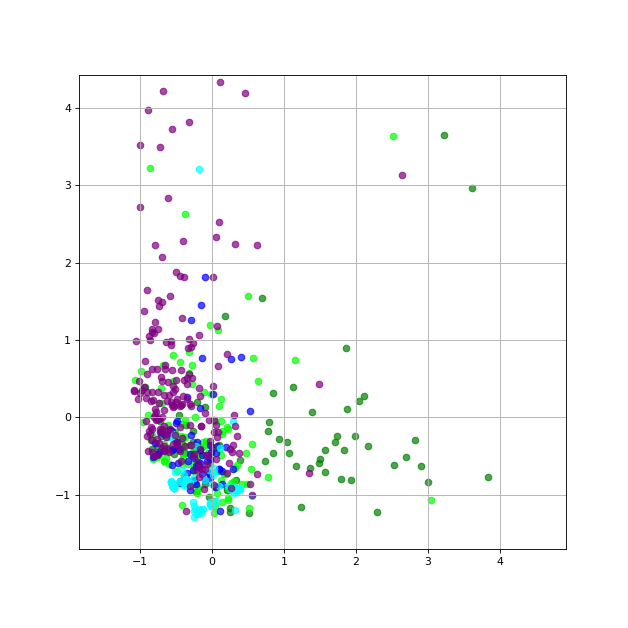

In [94]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

%matplotlib notebook

twibot20_pca = twibot20_train.sample(200).copy()
cresci17_pca = cresci17.sample(200).copy()
midterm18_pca = midterm18.sample(200).copy()
dataset_pca = dataset_model.sample(200).copy()
dataset_pca['label'] = 0

twibot20_pca['label'] = twibot20_pca['label'].apply(lambda lbl: ('twibot20', lbl))
cresci17_pca['label'] = cresci17_pca['label'].apply(lambda lbl: ('cresci17', lbl))
#midterm18_pca['label'] = midterm18_pca['label'].apply(lambda lbl: ('midterm18', lbl))
dataset_pca['label'] = dataset_pca['label'].apply(lambda lbl: ('dataset', lbl))

data = pd.concat([twibot20_pca, cresci17_pca, dataset_pca])
X_raw = data.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])

sc = StandardScaler()
sc.fit(X_raw)
X = sc.transform(X_raw)
y = data['label']

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

colors = [(("twibot20", 0), 'green'), (("twibot20", 1), 'lime'),
          (("cresci17", 0), 'blue'), (("cresci17", 1), 'cyan'),
          (("dataset", 0), 'purple'), (("dataset", 1), 'magenta')]
for label, c in colors:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()


twibot20_pca = twibot20_pca[0:0]
cresci17_pca = cresci17_pca[0:0]
midterm18_pca = midterm18_pca[0:0]

# Random code

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

Y_train = train_features['label']
X_train = train_features.drop(['label'], axis=1)

Y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)
# Split dataset into training set and test set

X_test.info()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values,Y_train.values)

y_pred=clf.predict(X_test.values)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
profiles = [profile for profile in train_raw_data[train_raw_data["label"] == 0].sample(n=30)["profile"]]
for profile in profiles:
    print("https://twitter.com/"+str(profile['screen_name'])+"\n")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features['label']

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=c, alpha=0.7)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
#ax.scatter(X[y , 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="c")

ax.set_xlim3d(-10,20)
ax.set_zlim3d(-10,10)

fig.add_axes(ax)

plt.show()

In [ ]:
%matplotlib notebook

import pandas as pd
import numpy as np

files_genuine = ["../cresci-2017.csv/genuine_accounts.csv/users.csv"]
files_bots = ["../cresci-2017.csv/traditional_spambots_1.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_2.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_3.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_4.csv/users.csv",
              "../cresci-2017.csv/social_spambots_1.csv/users.csv",
              "../cresci-2017.csv/social_spambots_2.csv/users.csv",
              "../cresci-2017.csv/social_spambots_3.csv/users.csv"]

train_raw_data_genuine = pd.concat((pd.read_csv(f) for f in files_genuine))
train_raw_data_genuine['label'] = 0

train_raw_data_bots = pd.concat((pd.read_csv(f) for f in files_bots))
train_raw_data_bots['label'] = 1

train_raw_data = pd.concat((train_raw_data_genuine, train_raw_data_bots))
train_raw_data = train_raw_data.rename(columns={})

train_profile = train_raw_data

train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

train_profile.set_index('id', inplace=True)

#Douteux
#train_profile = train_profile.replace([0], 1)

def date_converter(dt):
    try:
        return pd.to_datetime(dt)
    except:
        return pd.to_datetime("1185440851000", unit="ms", utc=True)

train_profile.created_at = train_profile.created_at.apply(date_converter)

train_labels = train_raw_data["label"].values
train_dict = {"statuses_count":train_profile.statuses_count, 
                "followers_count":train_profile.followers_count, 
                "friends_count":train_profile.friends_count, 
                "favourites_count":train_profile.favourites_count, 
                "listed_count":train_profile.listed_count, 
                "default_profile":train_profile.default_profile,
                "profile_use_background_image":train_profile.profile_use_background_image,
                "verified":train_profile.verified,
                "user_age":(pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days,
                "tweet_freq": np.nan_to_num(train_profile.statuses_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_growth_rate": np.nan_to_num(train_profile.followers_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "friends_growth_rate" : np.nan_to_num(train_profile.friends_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "favourites_growth_rate" : np.nan_to_num(train_profile.favourites_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "listed_growth_rate" : np.nan_to_num(train_profile.listed_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_friends_ratio" : np.nan_to_num(train_profile.followers_count / train_profile.friends_count, posinf=0.0),
                "screen_name_length": train_profile.screen_name.str.len(),
                "num_digits_in_screen_name": train_profile.screen_name.str.count('\d'),
                "name_length": train_profile.name.str.len(),
                "num_digits_in_name": train_profile.name.str.count('\d'),
                "description_length": train_profile.description.str.len(),
                 "label":train_labels
               }
train_features2 = pd.DataFrame(data=train_dict)
train_features2 = train_features2.replace({'True ': True, 'False ': False})
train_features2 = train_features2.fillna(0)
train_features2.default_profile = train_features2.default_profile.astype(bool)
train_features2.verified = train_features2.verified.astype(bool)
train_features2.profile_use_background_image = train_features2.profile_use_background_image.astype(bool)

train_features2.describe()

In [ ]:
train_profile

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features2.drop(['label', 'verified'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features2['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features2.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features2['label']

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=c, alpha=0.7)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
#ax.scatter(X[y , 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="c")


fig.add_axes(ax)
ax.set_xlim3d(0,50)
ax.set_ylim3d(-10,30)
ax.set_zlim3d(-10,10)


plt.show()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = train_features2['label']
X = train_features2.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
indexes = X_test[y_pred == 1].index
profiles = test_profile.loc[test_profile.index.isin(indexes)]
for i, profile in profiles.iterrows():
    print("https://twitter.com/"+profile.screen_name+"\n")

In [ ]:
profiles.values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
%matplotlib notebook

import pandas as pd
import numpy as np

file_users = "../midterm-2018_processed_user_objects.json"
file_bots = "../midterm-2018.tsv"

midterm2018_profile = pd.read_json(file_users)
midterm2018_labels = pd.read_csv(file_bots, names=['id', 'label'], sep='\t')

midterm2018_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = midterm2018_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

midterm2018_profile = midterm2018_profile.rename(columns={'user_id': 'id'})

midterm2018_profile.set_index('id', inplace=True)
midterm2018_labels.set_index('id', inplace=True)

def date_converter(dt):
    try:
        return pd.to_datetime(dt)
    except:
        return pd.to_datetime("1185440851000", unit="ms")

midterm2018_profile.probe_timestamp = midterm2018_profile.probe_timestamp.apply(date_converter)
midterm2018_labels.label = midterm2018_labels.label.apply(lambda l: 1 if l == 'bot' else 0)

In [ ]:
midterm2018_dict = {"statuses_count":midterm2018_profile.statuses_count, 
                "followers_count":midterm2018_profile.followers_count, 
                "friends_count":midterm2018_profile.friends_count, 
                "favourites_count":midterm2018_profile.favourites_count, 
                "listed_count":midterm2018_profile.listed_count, 
                "default_profile":midterm2018_profile.default_profile,
                "profile_use_background_image":midterm2018_profile.profile_use_background_image,
                "verified":midterm2018_profile.verified,
                "user_age":(pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days,
                "tweet_freq": np.nan_to_num(midterm2018_profile.statuses_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "followers_growth_rate": np.nan_to_num(midterm2018_profile.followers_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "friends_growth_rate" : np.nan_to_num(midterm2018_profile.friends_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "favourites_growth_rate" : np.nan_to_num(midterm2018_profile.favourites_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "listed_growth_rate" : np.nan_to_num(midterm2018_profile.listed_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "followers_friends_ratio" : np.nan_to_num(midterm2018_profile.followers_count / midterm2018_profile.friends_count, posinf=0.0),
                "screen_name_length": midterm2018_profile.screen_name.str.len(),
                "num_digits_in_screen_name": midterm2018_profile.screen_name.str.count('\d'),
                "name_length": midterm2018_profile.name.str.len(),
                "num_digits_in_name": midterm2018_profile.name.str.count('\d'),
                "description_length": midterm2018_profile.description.str.len(),
               }

midterm2018_features = pd.DataFrame(data=midterm2018_dict)
midterm2018_features = pd.concat([midterm2018_features, midterm2018_labels], axis=1)
midterm2018_features = midterm2018_features.fillna(0)

midterm2018_features.describe()

In [ ]:
midterm2018_features.head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = midterm2018_features.drop(['label', 'verified'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = midterm2018_features['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.xlim(-8, 50)
plt.ylim(-10,55)
plt.show()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = midterm2018_features['label']
X = midterm2018_features.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
train_features2

In [ ]:
midterm2018_features

In [ ]:
midterm2018_cresci17_features = pd.concat([midterm2018_features.sample(n = 10000), train_features2.sample(n = 10000)])
midterm2018_cresci17_features

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = midterm2018_cresci17_features['label']
X = midterm2018_cresci17_features.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
y_test = train_features2['label']
X_test = train_features2.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
indexes = X_test[y_pred == 1].index
profiles = train_profile.loc[test_profile.index.isin(indexes)]
for i, profile in profiles.iterrows():
    print("https://twitter.com/"+profile.screen_name+"\n")

In [ ]:
indexes = X_test[y_pred == 1].index
profiles = train_profile.loc[test_profile.index.isin(indexes)]

In [ ]:
midterm2018_features[midterm2018_features.statuses_count < 5]